In [45]:
import  sys; sys.path.append("../src")
from indirect import Indirect
from optimisation import conds
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

[ 9.47892606 -0.13337226 -0.63211291 -0.99985472 -0.99949505]
[11.83707712 -0.0445775  -0.061533    0.99949776  0.95813834]
[10.86678129 -0.11658295 -0.57891227 -0.99469745 -0.98693684]
[ 1.28952614e+01  8.18632782e-03 -5.39040297e-02 -3.88534281e-01
 -3.61077135e-01]
[12.38055259 -0.030901   -0.3380058  -0.99999856 -0.95865655]
[9.20161864 0.13844158 0.6369433  0.99999431 0.99954326]
[ 9.20161483 -0.13844185 -0.63694431 -0.99999579 -0.99954474]
[ 9.78155793 -0.11090071 -0.51127117 -0.98413141 -0.96159948]
[11.30654521 -0.11680223 -0.58940675 -0.99996449 -0.99414527]
[13.14622607 -0.10157848 -0.58884916 -0.98580454 -0.98467019]
[13.01699743  0.03194645  0.32720854  0.99655217  0.98393273]


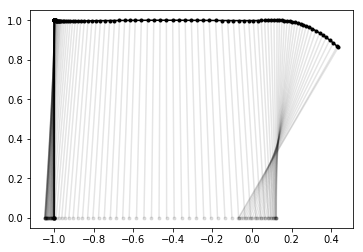

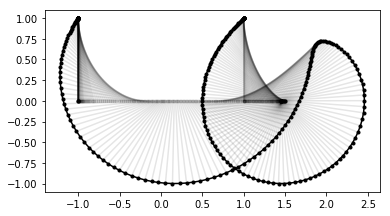

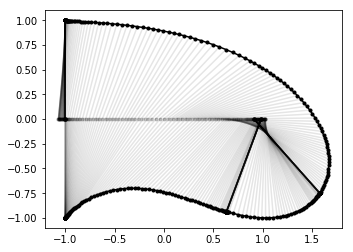

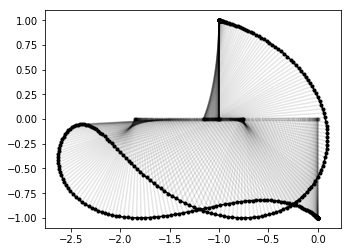

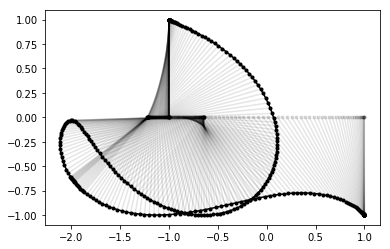

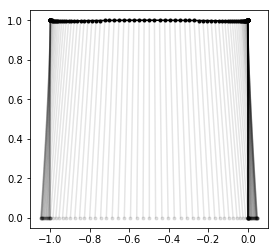

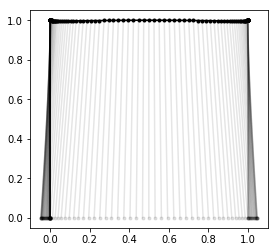

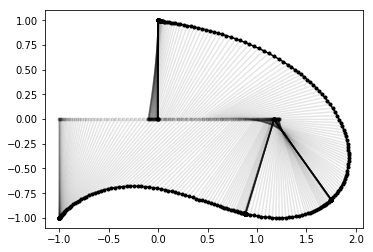

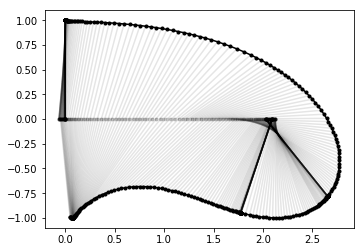

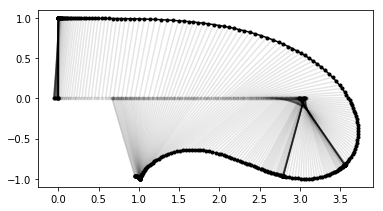

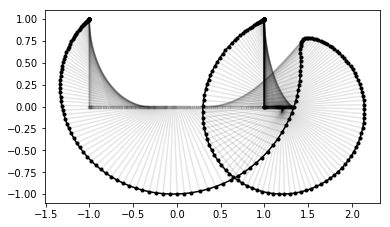

In [46]:
# plot all nominal energy optimal trajectories
for cond in conds:
    fname = "../data/nominal_energy/" + str(cond) + ".npy"
    try:
        dv = np.load(fname)
    except:
        continue
    print(dv)
    seg = Indirect(*cond)
    tl, xl, ul = seg.propagate(*seg.decode(dv), 0.1, controls=True)
    seg.plot_traj(xl)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa8d23eb8>,
      dtype=object)

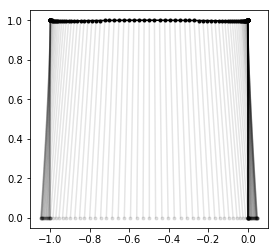

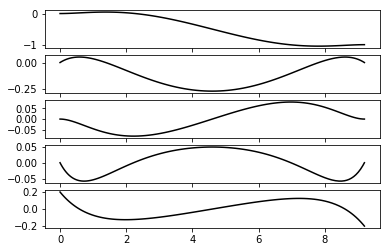

In [37]:
# sample nominal trajectory
xf = [-1,0,0,0]
x0 = [0,0,0,0]
nedir = "../data/nominal_energy/"
dv = np.load(nedir + str((x0,xf)) + ".npy")
seg = Indirect(x0, xf)
tl, xl, ul = seg.propagate(*seg.decode(dv), 0.1, controls=True)
seg.plot_traj(xl)
seg.plot_timeline(tl, xl, ul)

In [43]:
# slice trajectory
Tls, xls = seg.sample_traj(tl, xl)

In [44]:
# sample from sample
T, xl0 = Tls[0], xls[0,:]
xls

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.01578476e-01, -5.88849162e-01,
        -9.85804540e-01, -9.84670187e-01],
       [-5.99402743e-05, -5.04460957e-03,  5.99430657e-05,
         5.04508231e-03, -1.01578476e-01, -5.86456507e-01,
        -9.62882330e-01, -9.61720843e-01],
       [-1.49467415e-02, -5.60467349e-02,  1.52232186e-02,
         5.84556760e-02, -1.01578476e-01, -5.44424567e-01,
        -6.37263535e-01, -6.35313687e-01],
       [-5.48580147e-02, -2.88777603e-02,  6.64942654e-02,
         6.26808581e-02, -1.01578476e-01, -4.66167693e-01,
        -2.96340673e-01, -2.92385071e-01],
       [ 3.74762165e-02,  1.66118582e-01,  1.19003066e-01,
         1.23398481e-02, -1.01578476e-01, -3.18683020e-01,
        -7.48979741e-02, -6.21193081e-02],
       [ 5.40136230e-01,  3.78659128e-01,  1.34695343e-01,
         2.50638942e-02, -1.01578476e-01, -1.36697850e-01,
        -4.91024911e-02,  2.63094886e-02],
       [ 1.35564075e+00,  5.225236